

# Project: Investigate a Dataset - [TMDB 5000 Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Research Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>

</ul>

<a id='intro'></a>
## Introduction
I will be investigating the dataset (TMDB 5000 Movie Dataset), and trying to answer my research questions in this project.

***A brief about the dataset***

        A great dataset, with data on the plot, cast, crew, budget, and revenues of several thousand films.
     

        
        

<a id='questions'></a>

## Research Questions




***My Research Questions for this project are:***
        
        Data Wrangling:
        
        1- What is the size of the Dataset, and how many columns does it have?
        2- state the data type of each column?
        3- give me the number of missing values in each column? and plot it as a heat map.
        
        
        
        Exploratory Data Analysis
        
        4- Give simple statistical analysis of vote_average? And show its distribution.
        5- What was the top 3 earning movies? and show the revenue distribution
        6- Show a Scatterplot demonstrating the relationship between vote_average & revenue.
        

#importing statements for all of the packages we will use

import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns



I imported the necessary packages for the project in this step.

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [4]:

# Loading data 

movies = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")

# printing out a few lines and checking the size of the dataset 

movies.head

# Size = 10,866 records(rows) & 21 Attributes(columns)



<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

I loaded the dataset, an inspected the top 5 rows using (dataset.head). 

In [5]:

#inspecting columns & data types

print(movies.dtypes)


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


Listed all columns with their types (dataset.dtypes). 

In [6]:
# look for instances of missing or possibly errant data
missing_values = movies.isnull()

print(missing_values)


          id  imdb_id  popularity  budget  revenue  original_title   cast  \
0      False    False       False   False    False           False  False   
1      False    False       False   False    False           False  False   
2      False    False       False   False    False           False  False   
3      False    False       False   False    False           False  False   
4      False    False       False   False    False           False  False   
...      ...      ...         ...     ...      ...             ...    ...   
10861  False    False       False   False    False           False  False   
10862  False    False       False   False    False           False  False   
10863  False    False       False   False    False           False  False   
10864  False    False       False   False    False           False  False   
10865  False    False       False   False    False           False  False   

       homepage  director  tagline  ...  overview  runtime  genres  \
0    

Printed the dataset as boolean expressions, where False means the cell isn't empty(not null), and true means it's empty(null). 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


<AxesSubplot: >

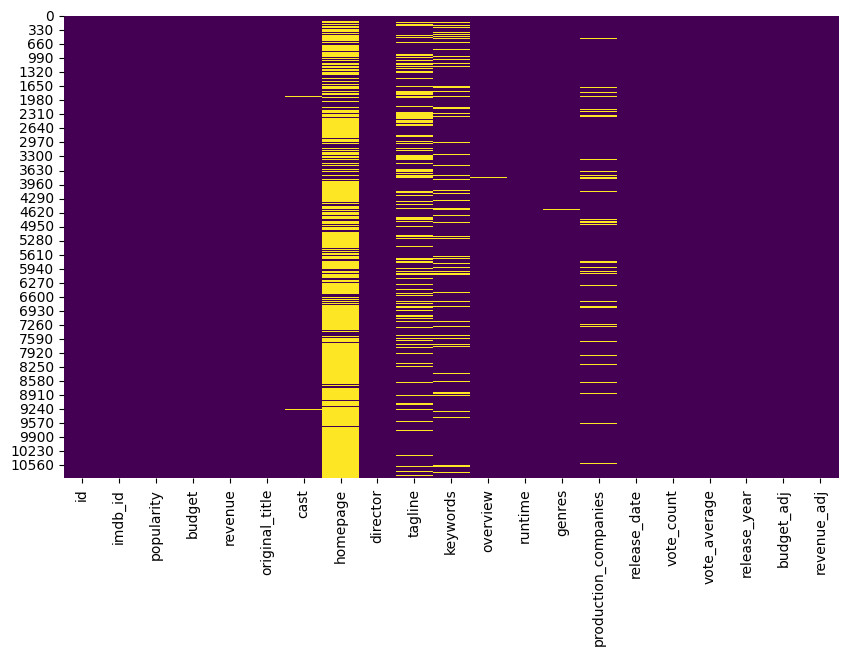

In [7]:
#returns number of null values in each column

missing_values_sum = movies.isnull().sum()

print(missing_values_sum)


#---------------------------------------------------------------------


#visualizing missing values

plt.figure(figsize=(10,6))
sns.heatmap(movies.isnull(), cmap='viridis', cbar=False)



Visualized Null values in the dataset as a heatmap.


### Data Cleaning

 

In [ ]:
#After inspecting the dataset I decided to drop rows where the (cast, overview, genres) are null & where budget = 0.
#And ignore (homepage, tagline, production_companies) since they are irrelevant to this analysis.

dropped_columns = ['cast','overview','genres']

cleaned_movies = movies.dropna(subset=dropped_columns)

cleaned_movies = cleaned_movies[cleaned_movies.budget!=0]

print(cleaned_movies)

#new count of records is 5,158 which means we removed 5,708 records 

After inspecting the dataset I decided to drop rows where the (cast, overview, genres) are null & where budget = 0.
And ignore (homepage, tagline, production_companies) since they are irrelevant to this analysis.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Give simple statistical analysis of vote_average? And show its distribution.)

6.031775882124855
1.5
8.4


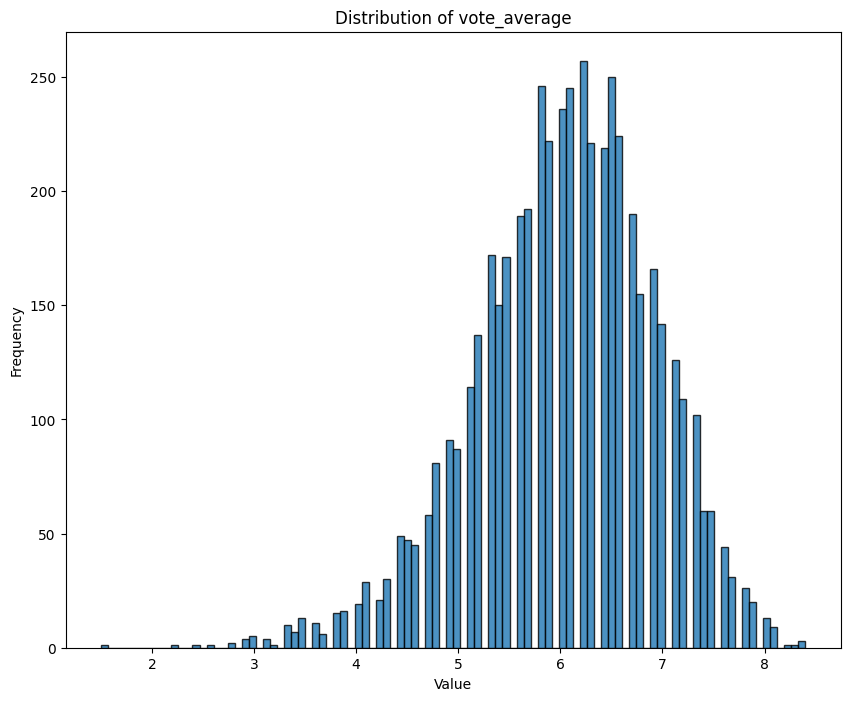

In [9]:
# Statistical analysis of vote_average

print(cleaned_movies.vote_average.mean())
#Avg Rating of a movie in that dataset is 6.03 out of 10

print(cleaned_movies.vote_average.min())
#Lowest Rating of a movie in that dataset was 1.5 out of 10

print(cleaned_movies.vote_average.max())
#Highest Rating of a movie in that dataset was 8.4 out of 10

#--------------------------------------------------------------------------------------------

#plotting distribution
def plotting_distribution(metric_to_distribute, no_bins, name):
    
    plt.figure(figsize=(10, 8))
    
    plt.hist(metric_to_distribute, bins=no_bins, edgecolor='black', alpha=0.8)
    #change number of bins for more or less clustered results

    plt.title(name)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    plt.show()

#Calling the plotting function 
plotting_distribution(cleaned_movies['vote_average'], 100, 'Distribution of vote_average')
# distribution of a single variable (1d)

Printed some statistical information about the dataset, and visualized vote_average distribution.

it shows density between vote rating 5.5 - 7.0. and terminal values of 1.5 & 8.4.

### Research Question 2  (What was the top 3 earning movies? and show the revenue distribution)

          id    imdb_id  popularity     budget     revenue  \
1386   19995  tt0499549    9.432768  237000000  2781505847   
3     140607  tt2488496   11.173104  200000000  2068178225   
5231     597  tt0120338    4.355219  200000000  1845034188   

                    original_title  \
1386                        Avatar   
3     Star Wars: The Force Awakens   
5231                       Titanic   

                                                   cast  \
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
3     Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
5231  Kate Winslet|Leonardo DiCaprio|Frances Fisher|...   

                                               homepage       director  \
1386                        http://www.avatarmovie.com/  James Cameron   
3     http://www.starwars.com/films/star-wars-episod...    J.J. Abrams   
5231              http://www.titanicmovie.com/menu.html  James Cameron   

                                        tagline  ...  \
1386    

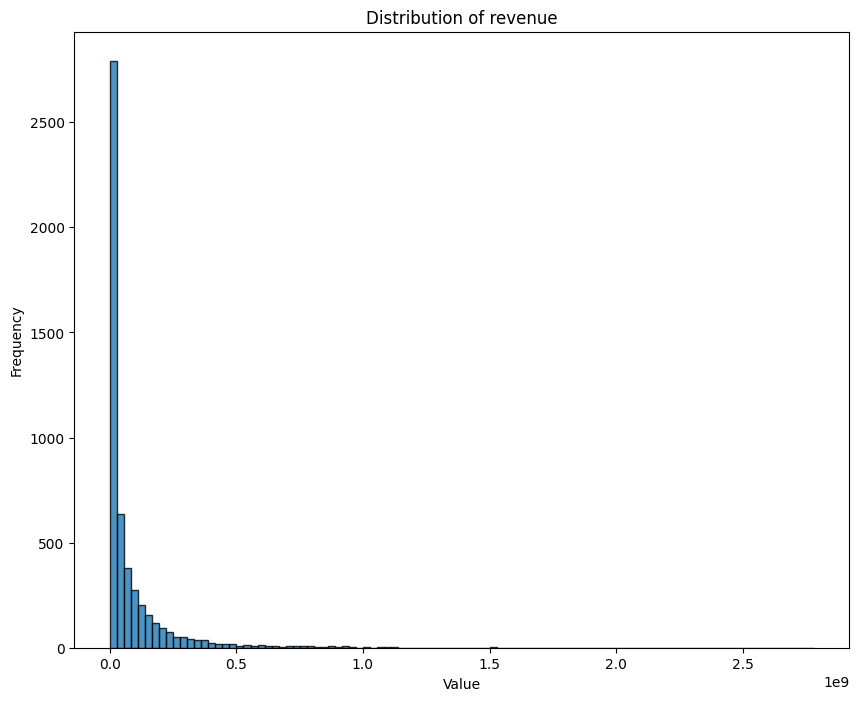

In [10]:
# TOp 3 earning movies

top_indices = cleaned_movies['revenue'].nlargest(3).index

top_rows = cleaned_movies.loc[top_indices]

print(top_rows)

#TOP 1: Avatar
#TOP 2: Star Wars: The Force Awakens
#TOP 3: Titanic

#---------------------------------------------------------------------

#Plotting distribution by calling the plotting function

plotting_distribution(cleaned_movies['revenue'], 100, 'Distribution of revenue')
# distribution of an other single variable (1d)




I showed the top 3 earning movies and their distribution, and they are as follow:
#TOP 1: Avatar
, #TOP 2: Star Wars: The Force Awakens
, #TOP 3: Titanic.

### Research Question 3  (Show a Scatterplot demonstrating the relationship between vote_average & revenue.)

Text(0, 0.5, 'Revenue')

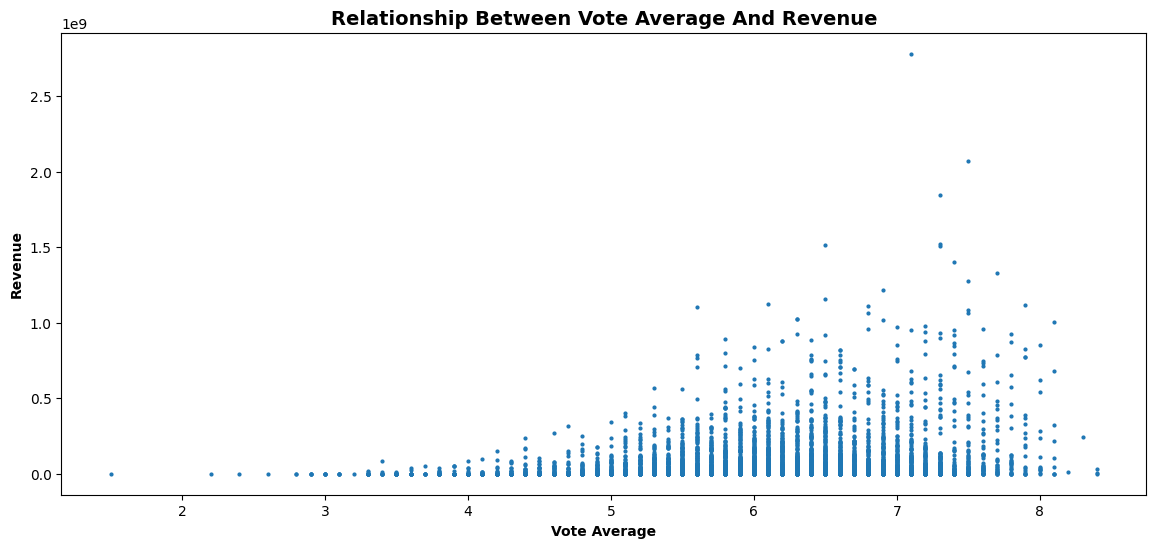

In [15]:
# Relationship between 2 variables (2d)
# Another type of plotting is shown in this section as requested 

#Scatter plot showing the relationship between vote_average & revenue_adj
cleaned_movies.plot(kind='scatter', x= 'vote_average', y= 'revenue',figsize=[14, 6], s=4)

#Adding title and formatting
plt.title(f'Relationship between vote average and revenue'.title(), fontsize = 14, weight = 'bold')

#Adding x label and formatting
plt.xlabel('vote average'.title(), fontsize = 10, weight = 'bold')

#Adding y label and formatting
plt.ylabel('revenue'.title(), fontsize = 10, weight = 'bold')

I showed another type of plotting, the main goal was to visualize a relationship between 2 variables (2D). The Scatter plot visualized the relationship between vote_average & revenue_adj. We notice that there is some relation between having a high vote average and getting higher revenue.

<a id='conclusions'></a>
## Conclusions

> **1**: Size of dataset = 10,866 records(rows) & 21 Attributes(columns).

> **2**: Data types of each column were shown in data wrangling section: General properties. 

> **3**: Number of missing values in each column and the heat map were shown in data wrangling section: General properties.

> **4**: The Highest Rating a movie got on this dataset is 8.4 and the lowest got 1.5, and the average movie rating in this data set is 6.03.

> **5**: we notice that none of the top 3 earning movies did get the highest rating, although all top 3 movies' ratings were considered above average. 

> **6**: The top 3 earning movies were 1- Avatar , 2- Star Wars: The Force Awakens , 3- Titanic.

> **7**: Scatterplot demonstrating the relationship between vote_average & revenue were shown in Exploratory Data Analysis section: Reasearch question 3.


<a id='limitations'></a>
## Limitations

> **1**: Dimensionality: Tried to visualize the unique genres distribution. But it High-dimensional nature can be challenging to analyze and visualize effectively, it had 2030 unique genres on (x-axis). Because exploring relationships between numerous variables becomes more complex as the dimensionality increases.

> **2**: Causation vs. Correlation: Establishing causation from observational data is challenging. Correlation does not imply causation, and inferring causal relationships requires careful consideration of study design and potential confounders.


In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 808564 bytes to Investigate_a_Dataset.html
